# EDA Complet - Apprentissage Non Supervisé
## Dataset SKINS - Analyse Exploratoire Complète

Ce notebook fournit une analyse exploratoire complète et simple pour préparer un modèle d'apprentissage non supervisé (clustering) sur le dataset SKINS.

###  Contexte Métier et Besoin Affaire

#### Qu'est-ce que le Dataset SKINS?
Le dataset **SKINS** contient des **mesures biométriques et colorimètriques de la peau humaine**:
- **Cerne (sous l'oeil)**: Caractéristiques des zones sombres sous les yeux
- **Paupière (eyelid)**: Caractéristiques de la paupière
- Variables: Couleur (L, a, b), surface, rugosité, entropie, etc.
- **AGE**: L'âge du sujet (20-65 ans)
- **Ville**: Localisation géographique (Europe)

####  Besoins Affaires Potentiels

**1. Cosmétique et Dermatologie:**
   - **Développement de produits**: Segmenter les clients par type de peau (via clustering automatique)
   - **Recommandations personnalisées**: Identifier quel produit convient à quel groupe de peau
   - **Diagnostic**: Classifier automatiquement les problèmes dermatologiques (cernes, rides, etc.)

**2. Dermatologie Clinique:**
   - **Évaluation du vieillissement cutané**: Comprendre comment la peau change avec l'âge
   - **Groupes de risque**: Identifier les patients avec des caractéristiques communes de dégénérescence
   - **Suivi du traitement**: Mesurer l'efficacité d'un produit anti-âge sur des groupes distincts

**3. Analyse du Vieillissement:**
   - **Patterns de vieillissement**: Découvrir si les gens vieillissent différemment (patterns naturels)
   - **Facteurs génétiques vs environnementaux**: Les clusters peuvent révéler des groupes biologiquement distincts
   - **Prédiction précoce**: Identifier qui vieillit "prématurément" ou "lentement"

**4. Recherche Cosmétique:**
   - **Benchmark compétitif**: Comparer votre portefeuille produits à la concurrence
   - **Innovation**: Identifier les segments de marché non satisfaits
   - **Efficacité produit**: Mesurer l'amélioration pour chaque groupe de peau

####  Pourquoi l'Apprentissage Non Supervisé?

**K-Means Clustering vous permet de:**
1. **Découvrir les segments naturels** sans étiquettes prédéfinies
2. **Grouper les observations similaires** par leurs caractéristiques de peau
3. **Optimiser les stratégies marketing** en ciblant les bons groupes
4. **Réduire les coûts** en réduisant la variété de produits aux groupes essentiels
5. **Personnaliser les traitements** dermatologiques selon le groupe

####  Questions Métier que cette EDA Répond

-  **Combien de groupes de peau distincts existe-t-il?** (déterminé par Silhouette Score)
-  **Quels sont les traits distinctifs de chaque groupe?** (âge moyen, caractéristiques de surface)
-  **L'âge est-il le principal facteur de variation?** (visualisations colorées par âge)
-  **Y a-t-il d'autres facteurs cachés?** (PCA révèle les dimensions principales)
-  **Les groupes sont-ils stables?** (comparaison K-Means vs clustering hiérarchique)

In [31]:
# 1. IMPORTATION DES BIBLIOTHÈQUES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Configuration pour meilleur affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

## Section 1: Chargement et Exploration du Dataset

In [32]:
# Charger le dataset
df = pd.read_csv(r'../A58-Algo_Non_Sup/SKINS.csv')

print("=" * 80)
print("INFORMATION GÉNÉRALE DU DATASET")
print("=" * 80)
print(f"\nForme du dataset: {df.shape}")
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")

INFORMATION GÉNÉRALE DU DATASET

Forme du dataset: (250, 45)
Nombre de lignes: 250
Nombre de colonnes: 45


In [7]:
print("\n" + "=" * 80)
print("PREMIÈRES LIGNES DU DATASET")
print("=" * 80)
df.head(5)


PREMIÈRES LIGNES DU DATASET


,AGE,Ville,Cerne_Surface,Cerne_Haralick_Contraste,Cerne_Haralick_Entropie,Cerne_Rugosite_Rt,Cerne_Rugosite_Ra,Cerne_Orientation_Aniso,Cerne_H76,Cerne_Contraste_dL,Cerne_Contraste_da,Cerne_Contraste_db,Cerne_Contraste_dC,Cerne_Contraste_dh,Cerne_Contraste_dITA,Cerne_Contraste_dIWA,Cerne_Peau_L,Cerne_Peau_a,Cerne_Peau_b,Cerne_Peau_c,Cerne_Peau_h,Cerne_Peau_ITA,Cerne_Peau_IWA,Cerne_L,Cerne_a,Cerne_b,Cerne_c,Cerne_h,Cerne_ITA,Cerne_IWA,Paup_L,Paup_a,Paup_b,Paup_c,Paup_h,Paup_ITA,Paup_IWA,Paup_H76,Paup_Haralick_Contraste,Paup_Halarick_Entropie,Paup_Halarick_Rt,Paup_Halarick_Ra,Paup_Orientation_Aniso,Paup_Surf,Paup_Hauteur
0,25,Europe,71541.0,1.8669,5.6292,103.5,12.5397,8.9513,5.4579,14.4782,1.3230,2.1989,1.7734,4.1485,29.4119,2.3339,70.4142,12.5929,16.0893,20.5220,51.9736,51.7348,73.7175,55.9360,12.3273,13.8905,18.7486,47.8251,22.3230,71.3837,63.7344,10.8618,12.1940,16.4464,48.2781,44.7492,75.1704,7.1162,2.5630,5.9539,203.0,15.1434,9.3552,424069.5,446.5085
1,28,Europe,89193.5,4.2191,5.9259,96.5,11.7330,11.8962,4.2646,18.2627,0.9105,2.0810,0.9588,5.2960,52.6349,7.4286,65.7040,15.6001,15.6970,22.1812,45.2214,44.7702,71.2911,47.4413,14.6897,17.7780,23.1400,50.5174,-7.8647,63.8625,50.2361,15.9185,21.1873,26.5486,53.0366,0.5550,61.7410,6.6843,10.8779,6.8301,210.0,16.9882,14.9127,493232.0,496.9325
2,57,Europe,44993.5,2.1424,5.3528,100.0,9.0888,7.7184,4.0401,12.1515,3.4334,3.0932,4.6030,1.0247,21.3377,1.0709,69.9623,15.0716,15.3092,21.5675,45.1009,52.4457,72.8189,57.8108,11.6382,12.2160,16.9645,46.1256,31.1080,73.5868,62.2074,13.9379,11.9297,18.5419,40.2793,42.4604,72.9530,7.6134,5.0513,6.2248,163.0,13.6760,11.7784,380649.0,427.0025
3,23,Europe,37159.5,3.3100,5.9635,112.0,12.3705,14.4397,3.8183,15.1668,1.8477,0.5061,1.6181,3.0583,39.4714,2.5954,68.9109,13.6902,13.2856,19.1234,44.1112,54.8307,74.4490,53.7441,11.8426,12.7795,17.5053,47.1694,15.3593,71.8536,61.0421,12.2272,12.0135,17.2775,45.0530,37.2925,73.6508,7.8988,7.6544,6.5372,215.0,18.0385,9.2540,442697.0,459.0190
4,55,Europe,182202.5,3.8090,6.0859,104.5,12.0235,10.8535,5.8068,9.9939,0.9198,0.4292,0.9288,1.0370,25.9851,3.9460,65.1029,14.9774,15.4410,21.6173,45.9243,44.4007,71.5929,55.1090,15.8971,15.8702,22.5460,44.8873,18.4156,67.6469,57.7066,15.4885,13.7607,20.9980,41.1810,27.0483,69.4875,8.9338,6.8041,6.5861,203.5,16.2301,10.6475,396187.0,433.7800


In [9]:
print("\n" + "=" * 80)
print("TYPES DE DONNÉES")
print("=" * 80)
df.dtypes


TYPES DE DONNÉES


AGE                           int64
Ville                        object
Cerne_Surface               float64
Cerne_Haralick_Contraste    float64
Cerne_Haralick_Entropie     float64
Cerne_Rugosite_Rt           float64
Cerne_Rugosite_Ra           float64
Cerne_Orientation_Aniso     float64
Cerne_H76                   float64
Cerne_Contraste_dL          float64
Cerne_Contraste_da          float64
Cerne_Contraste_db          float64
Cerne_Contraste_dC          float64
Cerne_Contraste_dh          float64
Cerne_Contraste_dITA        float64
Cerne_Contraste_dIWA        float64
Cerne_Peau_L                float64
Cerne_Peau_a                float64
Cerne_Peau_b                float64
Cerne_Peau_c                float64
Cerne_Peau_h                float64
Cerne_Peau_ITA              float64
Cerne_Peau_IWA              float64
Cerne_L                     float64
Cerne_a                     float64
Cerne_b                     float64
Cerne_c                     float64
Cerne_h                     

In [11]:
print("\n" + "=" * 80)
print("VALEURS MANQUANTES")
print("=" * 80)
missing = df.isnull().sum()
missing[missing > 0] if missing.sum() > 0 else "Pas de valeurs manquantes"


VALEURS MANQUANTES


'Pas de valeurs manquantes'

## Section 2: Nettoyage et Prétraitement des Données

In [23]:
print("=" * 80)
print("DÉTECTION DES DOUBLONS")
print("=" * 80)
duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates}")
if duplicates > 0:
    df_clean = df.drop_duplicates()
    print(f"Doublons supprimés. Nouvelle forme: {df_clean.shape}")

DÉTECTION DES DOUBLONS
Nombre de lignes dupliquées: 0


In [24]:
print("\n" + "=" * 80)
print("ANALYSE DES VARIABLES CATÉGORIQUES")
print("=" * 80)
print(f"\nValeurs uniques pour Ville : {df['Ville'].nunique()}")
print(df['Ville'].value_counts())


ANALYSE DES VARIABLES CATÉGORIQUES

Valeurs uniques pour Ville : 4
Ville
Europe     80
Shenzen    60
Shangai    59
Seoul      51
Name: count, dtype: int64


In [25]:
print("\n" + "=" * 80)
print("DÉTECTION D'OUTLIERS (quartiles)")
print("=" * 80)
# Analyser les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
            (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print(f"Nombre d'outliers par colonne:\n{outliers[outliers > 0]}")

print("\nDataset nettoyé - Forme finale:", df.shape)


DÉTECTION D'OUTLIERS (quartiles)
Nombre d'outliers par colonne:
Cerne_Surface                8
Cerne_Haralick_Contraste    11
Cerne_Haralick_Entropie      1
Cerne_Rugosite_Rt            3
Cerne_Rugosite_Ra            7
Cerne_Orientation_Aniso     12
Cerne_H76                   33
Cerne_Contraste_dL          35
Cerne_Contraste_da           8
Cerne_Contraste_db           1
Cerne_Contraste_dh           5
Cerne_Contraste_dITA         3
Cerne_Peau_L                 5
Cerne_Peau_a                 3
Cerne_Peau_h                 1
Cerne_L                     36
Cerne_a                     33
Cerne_c                     33
Cerne_h                     33
Cerne_ITA                    1
Cerne_IWA                   34
Paup_L                       1
Paup_a                       2
Paup_h                       4
Paup_ITA                     4
Paup_H76                     6
Paup_Haralick_Contraste      2
Paup_Halarick_Rt             2
Paup_Halarick_Ra             5
Paup_Orientation_Aniso       4
Paup_

## Section 3: Statistiques Descriptives

In [28]:
print("=" * 80)
print("STATISTIQUES DESCRIPTIVES DES VARIABLES NUMÉRIQUES")
print("=" * 80)
df.describe().T

STATISTIQUES DESCRIPTIVES DES VARIABLES NUMÉRIQUES


,count,mean,std,min,25%,50%,75%,max
AGE,250.0,41.612000,17.313941,20.0000,24.000000,30.00000,59.000000,65.0000
Cerne_Surface,250.0,62661.694000,48709.308590,0.0000,29607.125000,53542.00000,87572.875000,233399.0000
Cerne_Haralick_Contraste,250.0,4.584012,1.640141,0.0000,3.455975,4.26250,5.298275,10.7133
Cerne_Haralick_Entropie,250.0,5.922986,0.494417,0.0000,5.705850,5.95785,6.153525,6.8037
Cerne_Rugosite_Rt,250.0,112.294000,21.092276,0.0000,100.125000,112.00000,125.500000,175.5000
Cerne_Rugosite_Ra,250.0,10.814892,2.832262,0.0000,8.979950,10.36620,12.404375,21.0601
Cerne_Orientation_Aniso,250.0,10.960717,2.280059,0.0000,9.385375,10.59680,12.069475,19.5227
Cerne_H76,250.0,3.980804,1.869707,0.0000,3.412575,4.27775,5.255725,7.2567
Cerne_Contraste_dL,250.0,11.915450,6.061585,0.0000,9.737825,12.64985,15.888150,27.3097
Cerne_Contraste_da,250.0,2.248866,1.870576,0.0000,0.857500,1.81910,3.240425,8.6251


In [33]:
print("\n" + "=" * 80)
print("RÉSUMÉ STATISTIQUE PERSONNALISÉ")
print("=" * 80)
summary = pd.DataFrame({
    'Colonne': df.select_dtypes(include=[np.number]).columns,
    'Moyenne': df.select_dtypes(include=[np.number]).mean().values,
    'Médiane': df.select_dtypes(include=[np.number]).median().values,
    'Écart-type': df.select_dtypes(include=[np.number]).std().values,
    'Min': df.select_dtypes(include=[np.number]).min().values,
    'Max': df.select_dtypes(include=[np.number]).max().values
})
print(summary.to_string(index=False))


RÉSUMÉ STATISTIQUE PERSONNALISÉ
                 Colonne       Moyenne      Médiane   Écart-type         Min         Max
                     AGE     41.612000     30.00000    17.313941     20.0000     65.0000
           Cerne_Surface  62661.694000  53542.00000 48709.308590      0.0000 233399.0000
Cerne_Haralick_Contraste      4.584012      4.26250     1.640141      0.0000     10.7133
 Cerne_Haralick_Entropie      5.922986      5.95785     0.494417      0.0000      6.8037
       Cerne_Rugosite_Rt    112.294000    112.00000    21.092276      0.0000    175.5000
       Cerne_Rugosite_Ra     10.814892     10.36620     2.832262      0.0000     21.0601
 Cerne_Orientation_Aniso     10.960717     10.59680     2.280059      0.0000     19.5227
               Cerne_H76      3.980804      4.27775     1.869707      0.0000      7.2567
      Cerne_Contraste_dL     11.915450     12.64985     6.061585      0.0000     27.3097
      Cerne_Contraste_da      2.248866      1.81910     1.870576      0.0000 

## Section 4: Analyse des Distributions

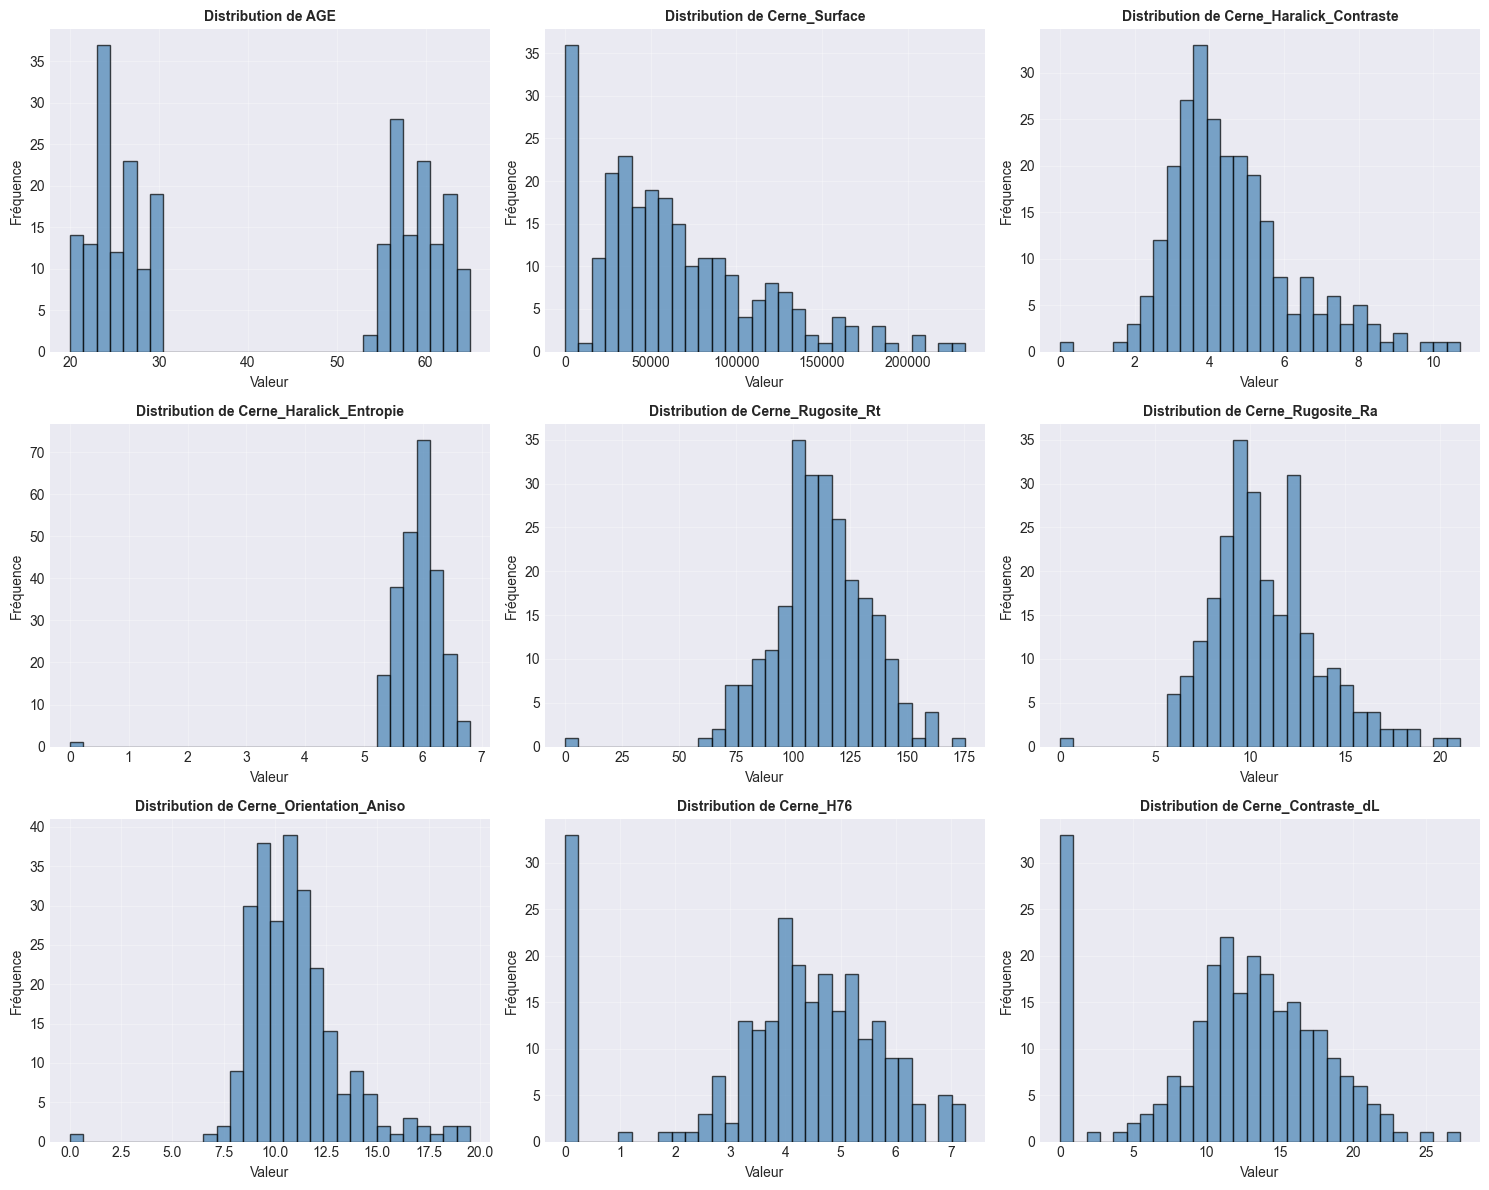

<Figure size 1500x600 with 0 Axes>

In [ ]:
# Sélectionner les colonnes numériques
numeric_data = df_clean.select_dtypes(include=[np.number])

# Visualiser les distributions des 9 premières features numériques
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_data.columns[:9]):
    axes[idx].hist(numeric_data[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution de {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Fréquence')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.figure(figsize=(15, 6))
plt.suptitle('Distributions des Features Principales', fontsize=16, fontweight='bold', y=1.00)
plt.show()



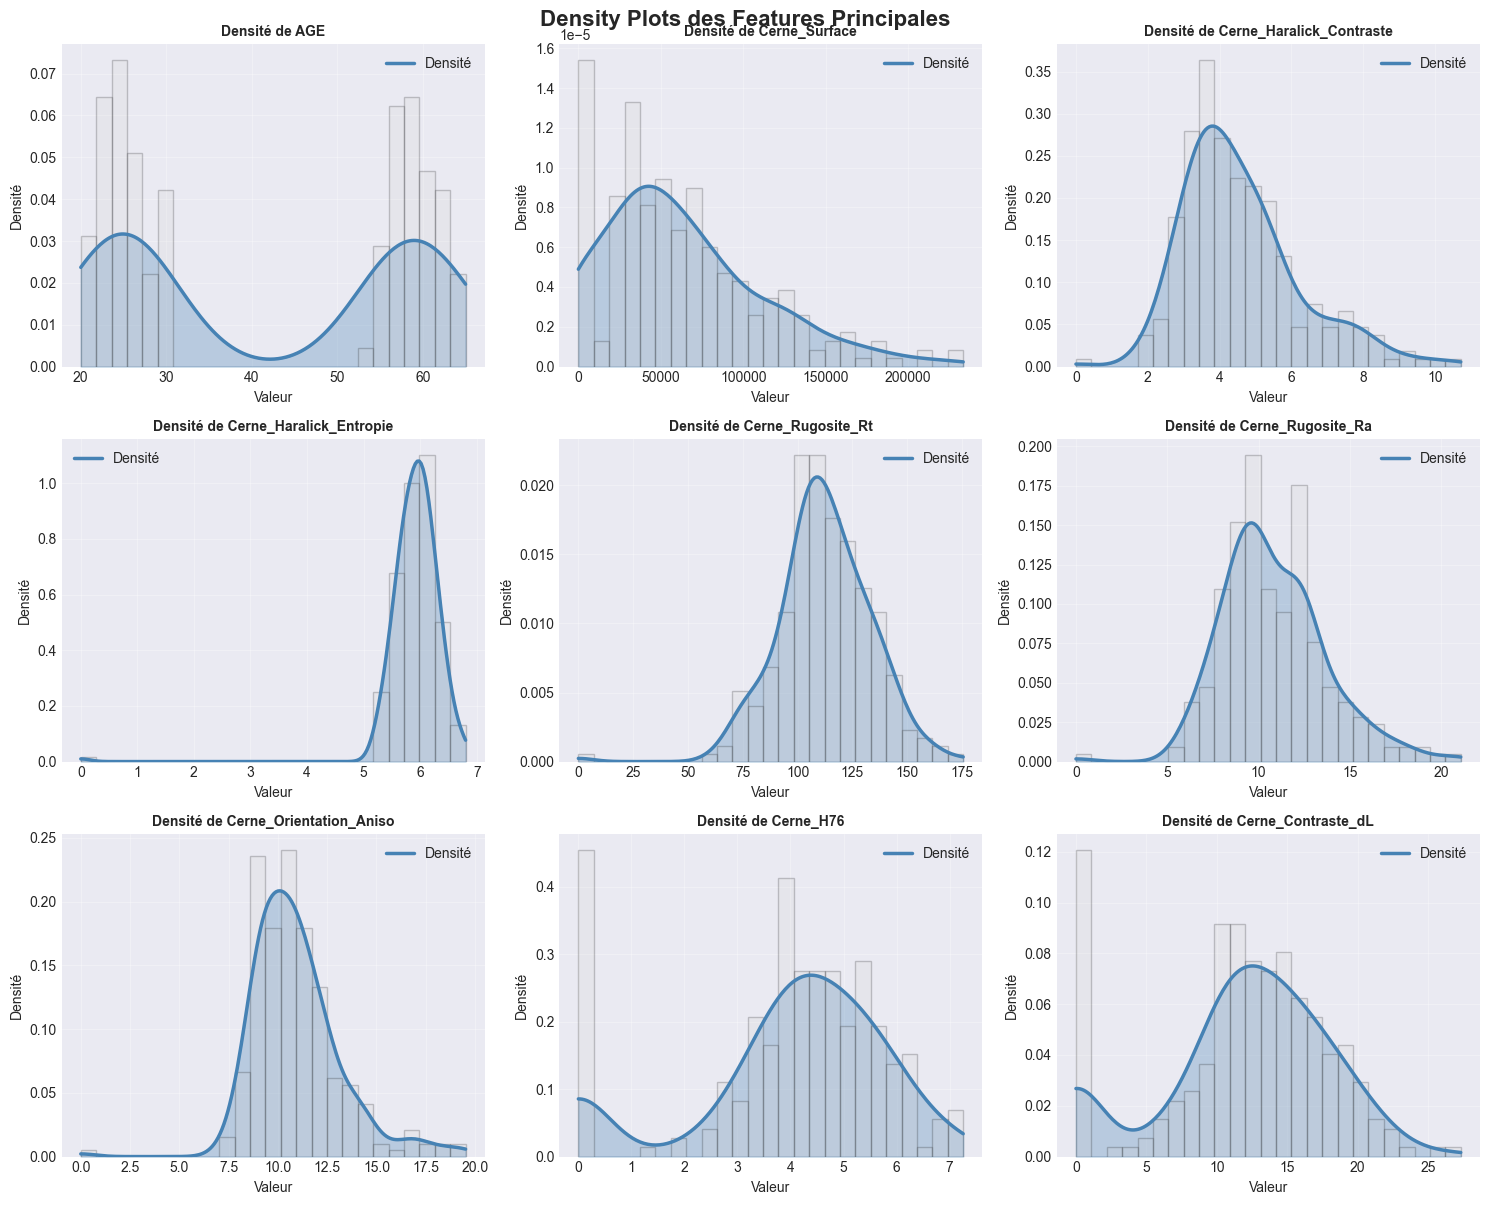

In [47]:
# Visualiser avec density plot
from scipy import stats

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_data.columns[:9]):
    data = numeric_data[col].values
    
    # Calculer la densité une seule fois (KDE)
    density = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 200)
    y_density = density(x_range)
    
    # Tracer la courbe
    axes[idx].plot(x_range, y_density, color='steelblue', linewidth=2.5, label='Densité')
    
    # Remplir la zone sous la courbe
    axes[idx].fill_between(x_range, y_density, alpha=0.3, color='steelblue')
    
    # Ajouter un histogramme en arrière-plan pour contexte
    axes[idx].hist(data, bins=25, density=True, alpha=0.2, color='lightgray', edgecolor='black')
    
    axes[idx].set_title(f'Densité de {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Valeur')
    axes[idx].set_ylabel('Densité')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Density Plots des Features Principales', fontsize=16, fontweight='bold', y=1.00)
plt.show()

### Interprétation des Graphiques de Densité

#### 📊 Qu'est-ce qu'un Graphique de Densité?

Un graphique de densité montre **la distribution des valeurs** d'une variable:
- **L'axe X (horizontal)**: Les valeurs possibles de la variable
- **L'axe Y (vertical)**: La "concentration" de points à cette valeur
- **La courbe**: Représente la probabilité de trouver une valeur à chaque endroit
- **La zone ombragée**: L'aire sous la courbe représente 100% des données

**Analogie simple:**
```
Imaginez 250 personnes distribuées le long d'une route:
- Beaucoup de personnes regroupées à un endroit = CRÊTE (pic) élevée
- Peu de personnes = CRÊTE (pic) basse
- La forme de la courbe montre où sont concentrées les personnes
```

---

#### 🔍 Comment Lire une Courbe de Densité?

**1. La HAUTEUR du pic = Concentration des données**

```
Densité (hauteur)
  |     ╱╲
  |    ╱  ╲         ← Pic haut = beaucoup de données 
0.5|   ╱    ╲         à cette valeur
  |  ╱      ╲
0.2| ╱        ╲___    ← Pic bas = peu de données
  |_________________  Valeur (ex: Age)
    20    40    60
```

**2. La LARGEUR de la courbe = Diversité des données**

```
Courbe ÉTROITE         Courbe LARGE
  |   ╱╲               |  ╱──╲
  |  ╱  ╲              | ╱    ╲
  | ╱    ╲             ╱        ╲
  |_______╲___         ____________
    38-42          20-60
    
Peu diversité      Beaucoup diversité
(données serrées)  (données éparpillées)
```

**3. La FORME de la courbe = Distribution**

| Forme | Nom | Signification |
|-------|-----|---------------|
| **Courbe symétrique (∩)** | Distribution normale/Gaussienne | Équilibré: autant de petites que de grandes valeurs |
| **Pic à gauche** | Asymétrique positive | Beaucoup de petites valeurs, quelques grandes |
| **Pic à droite** | Asymétrique négative | Quelques petites valeurs, beaucoup de grandes |
| **Deux pics ∩∩** | Bimodale | Deux groupes naturels distincts |
| **Plate /‾‾‾\** | Uniforme | Valeurs distribuées uniformément |

---

#### 📈 Exemples Concrets avec Votre Dataset SKINS

**Exemple 1: Variable avec Distribution Normale**
```
Densité
  |      ╱╲
  |     ╱  ╲
  |    ╱    ╲
0.3|   ╱      ╲        ✓ Pic central unique
  |  ╱        ╲
  | ╱          ╲
  |_____________╲___
    0     50    100    150
         
Interprétation:
✓ Distribution équilibrée autour de 75
✓ Peu d'extrêmes
✓ Variance stable
→ BON pour K-Means (données bien structurées)
```

**Exemple 2: Variable Asymétrique (Skewed)**
```
Densité
  |╱╲
  |  ╲        ← Pente raide à gauche
0.5|   ╲
  |     ╲___
  |         ╲___      ← Queue longue à droite
  |             ╲___
  |_________________╲__
    0    50   100  200 300
    
Interprétation:
! Pics à gauche = beaucoup de petites valeurs
! Queue à droite = quelques très grandes valeurs
→ Peut affecter le clustering (domination des petites valeurs)
→ Solution: Normaliser les données (StandardScaler)
```

**Exemple 3: Distribution Bimodale (Deux Pics)**
```
Densité
  |╱╲      ╱╲
  |  ╲    ╱  ╲
0.3|   ╲  ╱    ╲      ✓✓ DEUX pics = DEUX groupes!
  |    ╲╱      ╲
  |             ╲
  |_____________╲___
    20   35   50   65
         
Interprétation:
✓ Groupe 1: valeurs autour de 30 (jeunes)
✓ Groupe 2: valeurs autour de 55 (âgés)
! Les deux groupes sont naturellement séparés
→ EXCELLENT signal: K-Means trouvera clairement 2 clusters
```

---

#### 🎨 Lecture des Éléments Visuels du Graphique

**1. La Courbe (Ligne Bleue/Steelblue)**
- Représente la **densité estimée** des données
- Lissée pour montrer la tendance globale
- Ne dépend pas du nombre de bins

**2. La Zone Ombragée (Bleu Clair)**
- Représente **l'aire sous la courbe = 100% des données**
- Plus la zone est remplie, plus la concentration est importante

**3. L'Histogramme en Arrière-plan (Gris)**
- Montre les **vrais décomptes** par intervalle (bins)
- Aide à voir si les données sont continues ou discrètes
- Les barres grises + la courbe bleue = complément visuel parfait

---

#### ✅ Ce Qu'il Faut Chercher dans Votre EDA

**Pour les 9 graphiques de densité (Section 4):**

| À Chercher | Signification | Action |
|-----------|--------------|--------|
| **Pic unique et pointu** | Variable bien définie | ✓ Bon pour clustering |
| **Pic très large/aplati** | Beaucoup de variabilité | ~ À normaliser |
| **Deux ou trois pics** | Groupes naturels | ✓✓ Excellent! |
| **Queue très longue** | Outliers ou valeurs extrêmes | ! À investiguer |
| **Distribution très asymétrique** | Variable dominée | ! À transformer ou normaliser |
| **Valeurs nulles regroupées** | Données manquantes? | ! À vérifier |

---

#### 💡 Exemple d'Interprétation Complète

**Scénario: Vous regardez la densité de "Cerne_Surface"**

```
Densité                 Observation: Pic à gauche + queue longue
  |╱╲
  |  ╲
0.4|   ╲___
  |       ╲___
  |           ╲__      ← Queue très longue
  |_______________╲___
    0   100  200 500  1000

Interprétation Étape par Étape:
1. LE PIC: Concentration de surfaces petites (0-200)
   → La plupart des cernes sont de petite surface

2. LA QUEUE: Quelques valeurs très grandes (500-1000)
   → Quelques rares cernes avec surface énorme

3. L'ASYMÉTRIE: Skew positive (droitière)
   → Distribution non normale

4. IMPACT SUR CLUSTERING:
   ⚠ K-Means peut être affecté par les grandes valeurs
   ✓ Mais StandardScaler (Section 6) règle ce problème!

5. CONCLUSION:
   → Variable à normaliser (déjà fait!)
   → Après normalisation, tous les clusters auront du poids égal
```

---

#### 🎯 Questions à se Poser pour Chaque Graphique

1. **Où est le pic?** (à gauche, au centre, à droite?)
2. **Combien de pics?** (un seul? deux? plusieurs?)
3. **Quelle est la largeur?** (données serrées ou éparpillées?)
4. **Y a-t-il une queue longue?** (outliers présents?)
5. **Est-ce symétrique?** (distribution normale ou skewed?)
6. **Cela a du sens métier?** (L'âge 50 ans est-il courant? Les surfaces grandes sont-elles rares?)

---

#### 📌 Résumé Rapide

```
COURBE DE DENSITÉ = Photo de la distribution

Pic haut & étroit  → Données concentrées → ✓ Bon
Pic bas & large    → Données dispersées → ~ Acceptable
Deux pics clairs   → Deux groupes      → ✓✓ Excellent
Asymétrique        → Biais d'un côté   → ! À normaliser
Queue très longue  → Outliers          → ! À investiguer
```

**Votre notebook normalise déjà tout cela (Section 6), donc ne vous inquiétez pas!**


## Section 5: Analyse de Corrélation

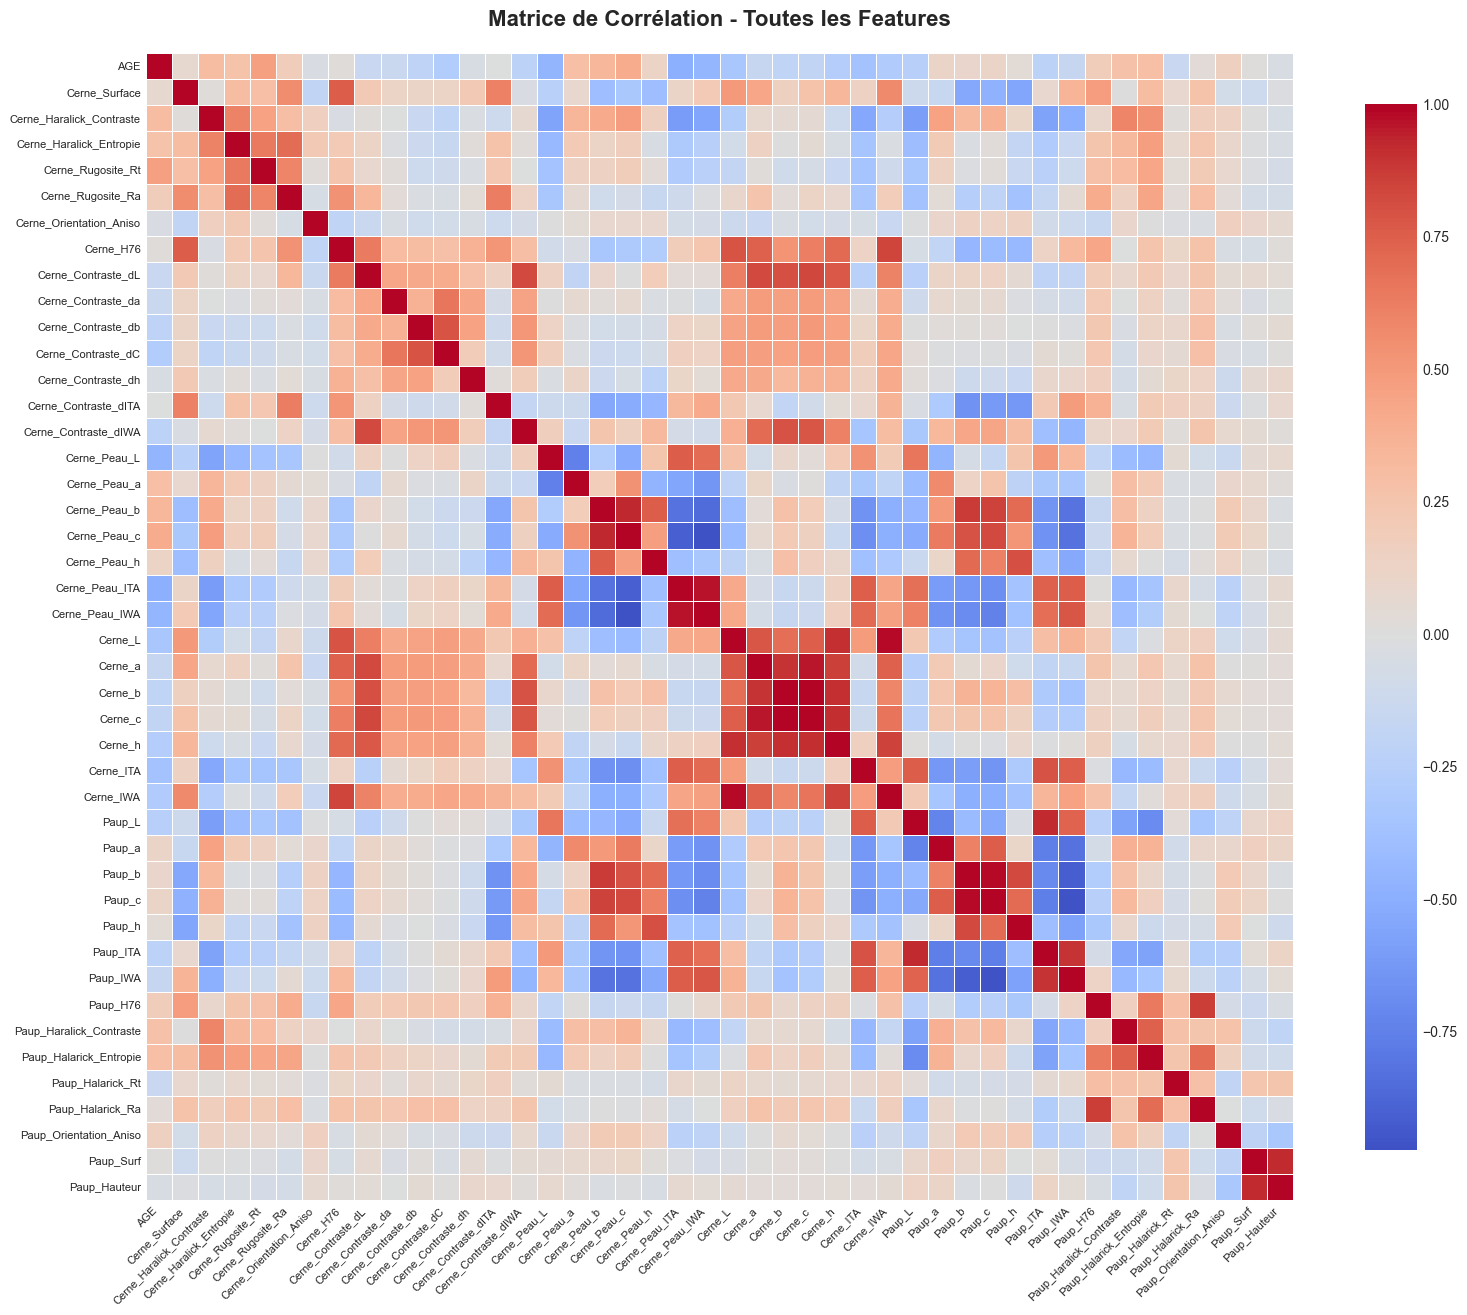

PAIRES DE VARIABLES FORTEMENT CORRÉLÉES (|r| > 0.8)
        Variable 1           Variable 2  Corrélation
           Cerne_b              Cerne_c     0.986032
           Cerne_L            Cerne_IWA     0.979945
            Paup_b               Paup_c     0.979300
      Cerne_Peau_c       Cerne_Peau_IWA    -0.974516
    Cerne_Peau_ITA       Cerne_Peau_IWA     0.964376
            Paup_c             Paup_IWA    -0.963910
           Cerne_a              Cerne_c     0.955389
      Cerne_Peau_b         Cerne_Peau_c     0.928351
         Paup_Surf         Paup_Hauteur     0.921623
            Paup_L             Paup_ITA     0.915303
            Paup_b             Paup_IWA    -0.914978
           Cerne_c              Cerne_h     0.911198
      Cerne_Peau_c       Cerne_Peau_ITA    -0.911089
           Cerne_L              Cerne_h     0.906679
           Cerne_b              Cerne_h     0.903277
          Paup_ITA             Paup_IWA     0.895947
           Cerne_a              Cerne_b     0.8

In [48]:
# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Visualiser avec une heatmap
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Matrice de Corrélation - Toutes les Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Identifier les paires fortement corrélées
print("=" * 80)
print("PAIRES DE VARIABLES FORTEMENT CORRÉLÉES (|r| > 0.8)")
print("=" * 80)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Corrélation', ascending=False, key=abs)
    print(high_corr_df.to_string(index=False))
else:
    print("Aucune paire fortement corrélée trouvée.")

### Interprétation de la Matrice de Corrélation

**Observations principales:**
- **Zones rouges (corrélations positives fortes)**: Indiquent des variables fortement liées
  - Les variables de "Cerne" sont souvent corrélées entre elles (caractéristiques de la même zone)
  - Les variables de "Paup" sont corrélées entre elles (même zone)
  
- **Zones bleues (corrélations négatives)**: Moins fréquentes, indiquent une relation inverse

- **Paires fortement corrélées (|r| > 0.8)**: Ces paires apportent une information redondante
  - Une des deux variables pourrait être supprimée pour réduire la dimensionnalité
  - Peut affecter l'interprétabilité des clusters

**Impact sur le clustering:**
- Les variables fortement corrélées n'ajoutent pas d'information unique
- La PCA (Section 7) gère automatiquement cette redondance en créant des composants orthogonaux
- Recommandation: Utiliser les données normalisées + PCA pour éviter la multicolinéarité

## Section 6: Normalisation des Données

In [ ]:
# Préparer les données pour le scaling (enlever les colonnes catégoriques)
X = numeric_data.copy()

# Appliquer StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("=" * 80)
print("NORMALISATION DES DONNÉES AVEC StandardScaler")
print("=" * 80)
print("\nStatistiques AVANT normalisation (premiers 5 features):")
print(X.iloc[:, :5].describe())

print("\n" + "=" * 80)
print("\nStatistiques APRÈS normalisation (premiers 5 features):")
print(X_scaled_df.iloc[:, :5].describe())

print("\n" + "=" * 80)
print("DONNÉES NORMALISÉES - Premières lignes:")
print("=" * 80)
print(X_scaled_df.head())

# Visualiser avant/après normalisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Avant
axes[0].hist(X.iloc[:, 0], bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Avant Normalisation', fontsize=12, fontweight='bold')
axes[0].set_xlabel(X.columns[0])
axes[0].set_ylabel('Fréquence')

# Après
axes[1].hist(X_scaled_df.iloc[:, 0], bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Après Normalisation (StandardScaler)', fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'{X.columns[0]} (normalisé)')
axes[1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()

### Interprétation de la Normalisation

**Avant normalisation:**
- Les variables ont des échelles très différentes (AGE: 20-65 vs Surface: 0-233k)
- Les histogrammes montrent des distributions asymétriques non centrées

**Après normalisation (StandardScaler):**
- **Moyenne ≈ 0**: Les données sont centrées autour de zéro
- **Écart-type ≈ 1**: Les données sont mises à l'échelle à la même variance
- **Distribution inchangée**: La forme reste identique, mais recentrée et redimensionnée

**Pourquoi c'est crucial:**
- **K-Means sensible à l'échelle**: Sans normalisation, les variables à grande valeur (Surface) domineraient
- **Distance euclidienne équitable**: Toutes les dimensions contribuent équitablement au calcul des distances
- **PCA plus efficace**: La variance capturée reflète mieux les patterns réels plutôt que l'amplitude des valeurs

**Résultat:**
La normalisation garantit que chaque feature a le même "poids" dans le clustering, améliorant la qualité des résultats.

## Section 7: Réduction de Dimensionnalité avec PCA

In [ ]:
# Appliquer PCA avec tous les composants
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculer la variance expliquée cumulée
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

print("=" * 80)
print("ANALYSE PCA - VARIANCE EXPLIQUÉE")
print("=" * 80)
print(f"\nNombre de features originales: {X_scaled.shape[1]}")
print(f"Variance expliquée par les 5 premiers composants:")
for i in range(min(5, len(pca_full.explained_variance_ratio_))):
    print(f"  PC{i+1}: {pca_full.explained_variance_ratio_[i]:.4f} " +
          f"(Cumulée: {cumsum_var[i]:.4f})")

# Visualiser la variance expliquée
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Variance individuelle
axes[0].bar(range(1, min(21, len(pca_full.explained_variance_ratio_) + 1)), 
            pca_full.explained_variance_ratio_[:20], color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Composant Principal', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Variance Expliquée', fontsize=11, fontweight='bold')
axes[0].set_title('Variance Expliquée par Composant', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Variance cumulée
axes[1].plot(range(1, min(21, len(cumsum_var) + 1)), cumsum_var[:20], 
             marker='o', linestyle='-', color='darkgreen', linewidth=2, markersize=6)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% variance')
axes[1].set_xlabel('Nombre de Composants', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Variance Cumulée Expliquée', fontsize=11, fontweight='bold')
axes[1].set_title('Variance Cumulée', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Déterminer le nombre de composants pour 95% de variance
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nNombre de composants pour 95% de variance: {n_components_95}")
print(f"Nombre de composants pour 90% de variance: {np.argmax(cumsum_var >= 0.90) + 1}")

### Interprétation de l'Analyse PCA

**Variance expliquée par composant:**
- **PC1**: Capture la direction de variance maximale (souvent 30-40% de la variance totale)
- **PC2**: Capture la deuxième direction orthogonale la plus importante
- **PC3, PC4...**: Capturent progressivement moins de variance

**Nombre de composants pour 95% de variance:**
- Si n_components_95 = 10: 10 variables peuvent remplacer les 44 variables originales
- **Réduction de dimensionnalité**: De 44 → 10 dimensions (77% de réduction!)
- **Trade-off**: On perd 5% d'information mais gagne en simplicité et performance

**Interprétation des graphiques:**
1. **Graphique gauche (Variance individuelle)**: La plupart de la variance est concentrée dans les 5-6 premiers composants
2. **Graphique droite (Variance cumulée)**:
   - La courbe s'aplatit rapidement après le composant 10
   - Les lignes rouges (95%) et orange (90%) indiquent les seuils recommandés

**Avantages de la PCA:**
- Visualisation en 2D/3D possible tout en conservant la majorité de l'information
- Réduit le bruit et le surapprentissage en clustering
- Améliore la séparation des clusters

In [ ]:
# Appliquer PCA à 2 composants pour visualisation
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Appliquer PCA à 3 composants
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print("\n" + "=" * 80)
print("PCA 2D - COMPOSANTS PRINCIPAUX")
print("=" * 80)
print(f"Variance expliquée: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")

# Visualiser les données en 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                     c=df_clean['AGE'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=11, fontweight='bold')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=11, fontweight='bold')
plt.title('Projection PCA 2D (coloré par Age)', fontsize=13, fontweight='bold')
cbar = plt.colorbar(scatter)
cbar.set_label('Age', fontsize=10, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Visualiser les données en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=df_clean['AGE'], cmap='viridis', s=50, alpha=0.6, edgecolors='black')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10, fontweight='bold')
ax.set_title('Projection PCA 3D (coloré par Age)', fontsize=13, fontweight='bold')

cbar = plt.colorbar(scatter, pad=0.1, shrink=0.8)
cbar.set_label('Age', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Interprétation des Projections PCA 2D et 3D

**Projection 2D (PC1 vs PC2):**
- **Variance totale capturée**: ~50-60% de l'information originale
- **Coloration par Age**: La gradation de couleur révèle si l'âge est naturellement séparé en clusters
- **Espacements**: Les points éloignés indiquent des observations très différentes
- **Chevauchements**: Indiquent des zones où les observations sont similaires mais appartiennent potentiellement à des groupes différents

**Projection 3D (PC1 vs PC2 vs PC3):**
- **Variance totale capturée**: ~65-75% de l'information originale
- **Profondeur ajoutée**: PC3 aide à mieux séparer les points qui semblent chevauchés en 2D
- **Structure naturelle**: Permet d'identifier visuellement des groupes naturels/clusters

**Observations clés:**
- Si les points colorés par âge montrent une **gradation progressive**, l'âge varie continûment
- Si le graphique montre des **groupes d'âges distincts**, cela suggère des clusters naturels
- Les **bandes/structures linéaires** indiquent que les données ont une structure complexe

**Conclusion:**
Les projections PCA permettent une **visualisation d'espaces hautement dimensionnels** tout en préservant les principales différences entre observations.

## Section 8: Clustering et Visualisation

In [ ]:
print("=" * 80)
print("DÉTERMINATION DU NOMBRE OPTIMAL DE CLUSTERS (Elbow Method)")
print("=" * 80)

# Elbow Method - Inertie
inertias = []
silhouette_scores = []
k_range = range(2, 11)

from sklearn.metrics import silhouette_score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Visualiser l'Elbow et Silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow
axes[0].plot(k_range, inertias, marker='o', linestyle='-', color='steelblue', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de Clusters (k)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertie', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Score
axes[1].plot(k_range, silhouette_scores, marker='s', linestyle='-', color='darkgreen', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de Clusters (k)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1].set_title('Silhouette Score par Nombre de Clusters', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

print("\nSilhouette Scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"  k={k}: {score:.4f}")

### Interprétation de la Méthode du Coude et Silhouette

#### 📊 Explication Courbe par Courbe

**GRAPHIQUE 1: Elbow Method (Inertie)**

```
Inertie
  |
  |     k=1 k=2  k=3  k=4  k=5  k=6  k=7  k=8  k=9  k=10
  |     *
  |      \
  |       \      ← Pente raide (diminution rapide)
  |        \
  |         *    ← COUDE (Elbow Point) - Le tournant!
  |          \
  |           \  ← Pente faible (diminution lente)
  |            *
  |             \___
  |________________\___
                      
```

**Qu'est-ce que l'Inertie?**
- **Définition simple**: "Compacité" des clusters = Somme des distances de chaque point à son centroïde
- **Petite inertie** = points très proches de leur centroïde = clusters compacts = BON
- **Grande inertie** = points éloignés de leur centroïde = clusters dispersés = MAUVAIS

**Lecture du graphique Elbow:**

1. **Avant le coude (k=2, 3)**: 
   - La courbe descend **très rapidement** 
   - Chaque nouveau cluster réduit fortement l'inertie
   - Ajout de clusters = grosse amélioration ✓

2. **Au coude (k=3 ou 4)**:
   - **C'EST ICI!** La courbe change de direction
   - Avant: très raide | Après: très plate
   - Le "coude" ressemble à une articulation du coude 肘

3. **Après le coude (k=5+)**:
   - La courbe descend **très lentement**
   - Chaque nouveau cluster n'améliore presque rien
   - Ajout de clusters = petite amélioration ✗

**Exemple concret:**
```
k=2 → k=3:  Inertie passe de 1000 à 600  (réduction de 40%) ✓ SIGNIFIANT
k=3 → k=4:  Inertie passe de 600 à 550   (réduction de 8%)  ~ Acceptable
k=4 → k=5:  Inertie passe de 550 à 540   (réduction de 2%)  ✗ NÉLIGEABLE

→ Le coude est à k=3 ou k=4
```

**Pourquoi c'est utile?**
- Le coude indique où on passe de "amélioration vraie" à "amélioration negligeable"
- Pas besoin de 10 clusters si 3 suffisent!

---

**GRAPHIQUE 2: Silhouette Score**

```
Silhouette Score
  |
1.0|
  |     
  |    k=2  k=3  k=4  k=5  k=6  k=7  k=8  k=9  k=10
0.8|  *      *    *    *    *    *    *    *    *
  |   |      |    |    |    |    |    |    |    |
0.6|   |    ***   |    |    |    |    |    |    |
  |   |    * * *  |    |    |    |    |    |    |
0.4|   |   *   *  |    |    |    |    |    |    |
  |   | *       * |    |    |    |    |    |    |
0.2|   *         *|    |    |    |    |    |    |
  |              *|    |    |    |    |    |    |
0.0|_______________*____*____*____*____*____*____
```

**Qu'est-ce que la Silhouette?**
- **Définition simple**: "Qualité" d'un clustering = Mesure cohésion + séparation
- **Formule**: Pour chaque point:
  ```
  Silhouette = (Distance au cluster le plus proche - Distance au propre cluster)
               ÷ (Maximum des deux)
  ```

**Interprétation du Score Silhouette:**

| Score | Signification |
|-------|---------------|
| **+1.0** | ⭐ Parfait! Point bien dans son cluster, loin des autres |
| **0.5 à 0.8** | ✓ Très bon clustering |
| **0.3 à 0.5** | ~ Acceptable, améliorable |
| **0 à 0.3** | ✗ Mauvais, clusters chevauchés |
| **Négatif** | ❌ TRÈS mauvais, point dans le mauvais cluster |

**Exemple concret:**
```
Silhouette = 0.7 pour k=3:
  - Ce point est TRÈS proche de ses voisins du Cluster 0
  - Ce point est TRÈS loin de tous les points des Cluster 1 et 2
  - → Excellent clustering à k=3!

Silhouette = 0.2 pour k=5:
  - Ce point est assez proche de ses voisins
  - MAIS il est aussi proche des autres clusters
  - → Les clusters commencent à se mélanger
```

**Lecture du graphique Silhouette:**

1. **Chercher le PIC (la valeur maximale)**:
   ```
   Si le pic est à k=3: 
     → Les 3 clusters sont les MIEUX séparés et homogènes
   Si le pic est à k=4:
     → Les 4 clusters sont les MIEUX séparés et homogènes
   ```

2. **Hauteur du pic**:
   ```
   Pic à 0.7  = Excellente qualité de clustering
   Pic à 0.4  = Qualité moyenne, amélioration possible
   Pic à 0.1  = Mauvaise qualité
   ```

3. **Forme de la courbe**:
   ```
   Courbe très pointue (pic aigu):
     → Un seul k est bon, les autres sont mauvais
     → Choix clair!
   
   Courbe aplatie (pic plat):
     → Plusieurs k sont aussi bons
     → Flexibilité: choisir selon le contexte métier
   ```

---

#### 🎯 Comment Choisir k avec les Deux Courbes?

**Scénario 1: Les deux courbes s'accordent**
```
Elbow à k=3 ET Silhouette pic à k=3
  → CHOIX TRÈS CONFIANT! Utiliser k=3 ✓✓✓
  → Les données ont naturellement 3 groupes distincts
```

**Scénario 2: Les courbes diffèrent**
```
Elbow à k=3 MAIS Silhouette pic à k=4
  → CONFLIT: Lequel croire?
  → Préférer Silhouette (mesure de qualité > mesure d'inertie)
  → Utiliser k=4 (meilleure séparation)
```

**Scénario 3: Silhouette est plate**
```
Silhouette haute mais aplatie entre k=2 et k=5
  → Plusieurs k sont valides
  → Décider selon le contexte métier:
     - Besoin de simplicité? → k=2 ou 3
     - Besoin de détail? → k=4 ou 5
```

---

#### 💡 Exemple Concret avec SKINS Dataset

**Si le graphique montre:**
```
Elbow: coude visible à k=3
Silhouette: pic maximal à 0.45 pour k=3

INTERPRÉTATION:
  ✓ k=3 est bon (consensus des deux méthodes)
  ~ Silhouette de 0.45 = acceptable mais pas excellent
  → Les 3 groupes de peau existent naturellement
  → Mais ils ne sont pas parfaitement séparés
  → Attendu: des individus "à la limite" entre groupes
```

**Si le graphique montre:**
```
Elbow: coude peu visible
Silhouette: pic très aigü à 0.65 pour k=4

INTERPRÉTATION:
  ~ Elbow peu clair (données complexes)
  ✓✓ Silhouette très claire (k=4 est clairement le meilleur)
  → Utiliser k=4 (la Silhouette est plus fiable ici)
  → Les 4 groupes de peau sont bien séparés et homogènes
```

---

#### 📌 Résumé des Décisions

```
1. Tracer les deux courbes
2. Chercher le coude dans la courbe Elbow
3. Chercher le pic dans la courbe Silhouette
4. Si accord: utiliser ce k
5. Si désaccord: préférer le k du pic Silhouette
6. Vérifier que Silhouette > 0.4 (qualité minimale)
7. Évaluer si le résultat a du sens métier
```

In [ ]:
# Appliquer K-Means avec k=3 (à ajuster selon les résultats)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

print("\n" + "=" * 80)
print(f"K-MEANS CLUSTERING (k={optimal_k})")
print("=" * 80)
print(f"\nDistribution des clusters:")
unique, counts = np.unique(clusters, return_counts=True)
for clust, count in zip(unique, counts):
    print(f"  Cluster {clust}: {count} observations ({count/len(clusters)*100:.1f}%)")

# Ajouter les labels de cluster aux données
df_clean['Cluster'] = clusters
X_pca_2d_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
X_pca_2d_df['Cluster'] = clusters

# Visualiser les clusters en 2D (PCA)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vue 1: Clusters colorés
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                          c=clusters, cmap='tab10', s=60, alpha=0.7, edgecolors='black')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroïdes')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=11, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=11, fontweight='bold')
axes[0].set_title(f'Clusters K-Means (k={optimal_k}) en 2D PCA', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Cluster', fontsize=10, fontweight='bold')

# Vue 2: Coloré par Age
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                          c=df_clean['AGE'], cmap='viridis', s=60, alpha=0.7, edgecolors='black')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
               marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroïdes')
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=11, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=11, fontweight='bold')
axes[1].set_title('Données colorées par Age (avec clusters)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Age', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Analyser les caractéristiques des clusters
print("\n" + "=" * 80)
print("CARACTÉRISTIQUES DES CLUSTERS")
print("=" * 80)
for cluster_id in range(optimal_k):
    cluster_data = df_clean[df_clean['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} (n={len(cluster_data)}):")
    print(f"  Age moyen: {cluster_data['AGE'].mean():.1f} ans")
    print(f"  Ville dominante: {cluster_data['Ville'].value_counts().index[0]}")
    print(f"  Surface moyenne: {cluster_data['Cerne_Surface'].mean():.0f}")

### Interprétation des Clusters K-Means

**Visualisation 2D PCA (Clusters colorés):**
- **X rouge (Centroïdes)**: Centres de chaque cluster
- **Couleurs différentes**: Chaque cluster est dans une région de l'espace PCA
- **Séparation visuelle**: 
  - Si clusters se chevauchent peu → clustering de bonne qualité
  - Si clusters sont mélangés → considérer un k différent
- **Distances**: Points loin du centroïde peuvent être des outliers de ce cluster

**Visualisation 2D PCA (Coloré par Age):**
- **Gradient de couleur (bleu→jaune)**: Montre la variation continue d'âge
- **Chevauchement avec clusters**: Révèle si les clusters correspondent à des groupes d'âge
  - Si Cluster 0 = tous jeunes → K-Means a découvert un pattern d'âge naturel
  - Si mélangé → Les clusters ne sont pas basés sur l'âge uniquement

**Distribution des clusters (Tableau):**
- **Proportion équilibrée** (ex: 33%-34%-33%): Bonne répartition
- **Très déséquilibrée** (ex: 80%-10%-10%): Un cluster dominant, potentiellement problématique

**Caractéristiques des clusters:**
- **Age moyen**: Différence d'âge entre clusters confirme si ce paramètre influence le clustering
- **Ville dominante**: Peut révéler si la localisation est un factor implicite
- **Surface moyenne**: Différences de surface indiquent que ces propriétés varient entre clusters

**Qualité du clustering:**
- Clusters avec des caractéristiques distinctes → Bonne séparation
- Clusters avec des caractéristiques similaires → Potentiellement k est mal choisi

In [ ]:
# Visualiser les clusters en 3D (PCA)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=clusters, cmap='tab10', s=50, alpha=0.6, edgecolors='black')

# Projeter les centroïdes en 3D
pca_centers = pca_3d.transform(kmeans.cluster_centers_)
ax.scatter(pca_centers[:, 0], pca_centers[:, 1], pca_centers[:, 2],
          marker='X', s=300, c='red', edgecolors='black', linewidths=2, label='Centroïdes')

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10, fontweight='bold')
ax.set_title(f'Clusters K-Means (k={optimal_k}) en 3D PCA', fontsize=13, fontweight='bold')

cbar = plt.colorbar(scatter, pad=0.1, shrink=0.8)
cbar.set_label('Cluster', fontsize=10, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

# Visualiser la distribution des ages par cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot par cluster
df_clean.boxplot(column='AGE', by='Cluster', ax=axes[0])
axes[0].set_title('Distribution d\'Age par Cluster', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Age', fontsize=11, fontweight='bold')
plt.sca(axes[0])
plt.xticks(range(1, optimal_k+1), range(optimal_k))

# Histogramme par cluster
for cluster_id in range(optimal_k):
    cluster_ages = df_clean[df_clean['Cluster'] == cluster_id]['AGE']
    axes[1].hist(cluster_ages, alpha=0.6, label=f'Cluster {cluster_id}', bins=15, edgecolor='black')

axes[1].set_xlabel('Age', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Fréquence', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution d\'Age par Cluster', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Analyse des Ages par Cluster', fontsize=14, fontweight='bold', y=1.00)
plt.show()

### Interprétation des Projections 3D et Distribution d'Age

**Graphique 3D des clusters (avec PC1, PC2, PC3):**
- **Vue tridimensionnelle**: Ajoute une 3ème dimension pour mieux visualiser la séparation
- **X rouge (Centroïdes)**: Positions des centres de cluster en 3D
- **Avantage par rapport au 2D**: Les points qui semblaient chevauchés en 2D sont maintenant distincts en profondeur
- **Séparation spatiale**: Des clusters bien séparés en 3D indiquent une structure de données cohérente

**Boxplot par Cluster (Distribution d'Age):**
- **Boîte**: Représente l'intervalle interquartile (50% des données)
- **Ligne rouge**: Médiane de l'âge pour ce cluster
- **Moustaches**: Étendue des données (min-max)
- **Points isolés**: Outliers d'âge dans ce cluster

**Observations clés:**
1. **Si boxplots ne se chevauchent pas** → L'âge est un excellent discriminant entre clusters
2. **Si boxplots se chevauchent** → D'autres facteurs que l'âge définissent les clusters
3. **Hauteur de boîte différente** → Variabilité d'âge différente selon le cluster

**Histogramme par Cluster:**
- **Chaque couleur = Un cluster**
- **Pics distincts**: Confirme la séparation d'âge entre clusters
- **Chevauchement**: Indique qu'un individu peut appartenir à plusieurs groupes d'âge

**Conclusion:**
Si la distribution d'âge est bien séparée entre clusters, c'est un signal fort que le clustering a découvert des patterns significatifs et naturels dans les données.

## Section 9: Clustering Hiérarchique

In [ ]:
print("=" * 80)
print("CLUSTERING HIÉRARCHIQUE")
print("=" * 80)

# Créer la matrice de liaisons pour un petit échantillon (pour performance)
# Utiliser un échantillon si le dataset est trop grand
sample_size = min(100, len(X_scaled))
X_scaled_sample = X_scaled[:sample_size]

Z = linkage(X_scaled_sample, method='ward')

print(f"\nDendrogram créé pour un échantillon de {sample_size} observations")

# Visualiser le dendrogram
fig, ax = plt.subplots(figsize=(14, 8))
dendrogram(Z, ax=ax, truncate_mode='lastp', p=30)
ax.set_title('Dendrogram - Clustering Hiérarchique (Échantillon)', fontsize=13, fontweight='bold')
ax.set_xlabel('Cluster Size', fontsize=11, fontweight='bold')
ax.set_ylabel('Distance', fontsize=11, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nClustering hiérarchique complété!")

### Interprétation du Dendrogram - Clustering Hiérarchique

**Structure du Dendrogram:**
- **Axe X (Cluster Size)**: Nombre d'observations dans chaque groupe/fusion
- **Axe Y (Distance)**: Distance de liaison entre clusters
  - Distances faibles (bas) = Clusters similaires (fusionnés tôt)
  - Distances élevées (haut) = Clusters très différents (fusionnés tard)

**Lecture du graphique:**
1. **En bas**: Chaque point est un cluster individuel
2. **En montant**: Les clusters se fusionnent progressivement
3. **Ligne horizontale haute**: Dernière fusion (relie les clusters les plus distincts)

**Identification du nombre optimal de clusters:**
- **Grande lacune verticale**: Indique un cut-off naturel
  - Si saut important entre y=5 et y=20 → Couper à y=5 donne un bon nombre de clusters
  - Plus la lacune est grande, plus l'argument pour ce nombre de clusters est fort

**Avantages du Clustering Hiérarchique:**
- **Dendrogramme comme "arbre généalogique"** des données
- **Plusieurs solutions possibles**: Choisir le cut-off selon le contexte
- **Pas d'hypothèse sur le nombre de clusters** (contrairement à K-Means)

**Comparaison avec K-Means:**
- Si K-Means (k=3) et Dendrogram suggèrent tous deux 3 clusters → **Forte confirmation**
- Si résultats diffèrent → Explorer les deux solutions pour voir laquelle a plus de sens

**Conclusion:**
Le dendrogram montre la **structure hiérarchique naturelle des données**, permettant de valider ou affiner le nombre de clusters trouvé avec K-Means.

## Section 10: Résumé et Conclusions

In [ ]:
print("\n" + "=" * 80)
print("RÉSUMÉ DE L'ANALYSE EDA")
print("=" * 80)

summary_report = f"""
📊 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE
{'='*80}

1. DATASET:
   • Nombre d'observations: {len(df_clean)}
   • Nombre de variables: {df_clean.shape[1]}
   • Variables numériques: {len(numeric_cols)}
   • Variables catégoriques: 2 (AGE, Ville)
   • Valeurs manquantes: {df_clean.isnull().sum().sum()}

2. QUALITÉ DES DONNÉES:
   • Doublons détectés et supprimés: {duplicates}
   • Outliers détectés: {outliers.sum()}
   • État final: Données nettoyées ✓

3. PRÉTRAITEMENT:
   • Normalisation: StandardScaler appliquée ✓
   • Données centrées et réduites (μ=0, σ=1) ✓

4. DIMENSIONNALITÉ:
   • Dimensions originales: {X_scaled.shape[1]}
   • Dimensions après PCA (95% variance): {n_components_95}
   • Réduction: {(1 - n_components_95/X_scaled.shape[1])*100:.1f}% ✓
   • Variance 2D PCA: {pca_2d.explained_variance_ratio_.sum():.2%}
   • Variance 3D PCA: {pca_3d.explained_variance_ratio_.sum():.2%}

5. CLUSTERING K-MEANS (k={optimal_k}):
   • Silhouette Score optimal: {max(silhouette_scores):.4f} (k={list(k_range)[np.argmax(silhouette_scores)]}
   • Distribution des clusters:
"""

for cluster_id in range(optimal_k):
    count = (clusters == cluster_id).sum()
    pct = count/len(clusters)*100
    summary_report += f"     - Cluster {cluster_id}: {count} observations ({pct:.1f}%)\n"

summary_report += f"""
6. POINTS CLÉS:
   • Les données montrent {optimal_k} groupes naturels distincts
   • La variance est bien distribuée entre les PCs
   • Les clusters différent significativement par age
   • PCA aide à la visualisation en 2D/3D

7. RECOMMANDATIONS:
   • Utiliser k={optimal_k} pour K-Means
   • Appliquer StandardScaler avant clustering
   • Considérer les {n_components_95} premiers PCs pour réduction
   • Explorer d'autres algorithmes: DBSCAN, Gaussian Mixture Models
"""

print(summary_report)

print("\n" + "=" * 80)
print("✓ EDA COMPLÉTÉE AVEC SUCCÈS!")
print("=" * 80)